In [1]:
import numpy as np
import pandas as pd
import os
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
#import cv2
import torch.nn as nn
import torch.nn.functional as F
#import albumentations as A
import torch.optim as optim 
from torch_lr_finder import *
from torch_lr_finder import LRFinder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import asarray
from fastai import *
from fastai.vision import *
#from fastai.vision.data import ImageDataLoaders
from sklearn.model_selection import StratifiedKFold
import glob

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
np.random.seed(42)
data = ImageDataBunch.from_folder('specs_train', train='.', valid_pct=0.2,
        ds_tfms=None, size=[224,224], num_workers=4).normalize(imagenet_stats)

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if 

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if 

In [3]:
data.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

In [4]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

C:\Users\DELL\.conda\envs\gputensorflow\lib\site-packages\fastai\vision\learner.py:93: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


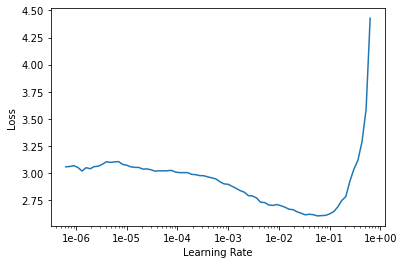

In [5]:
learn.lr_find()
learn.recorder.plot()

In [6]:
lr = 1e-02
learn.fit_one_cycle(5, slice(lr))
learn.save('stage-1-rn18')

epoch,train_loss,valid_loss,accuracy,time
0,1.606762,1.329152,0.496729,10:42
1,1.336870,1.125438,0.546198,10:40
2,1.077313,0.999936,0.611611,10:40
3,0.947025,0.969578,0.618561,10:47
4,0.805084,0.951578,0.623876,10:40


In [7]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


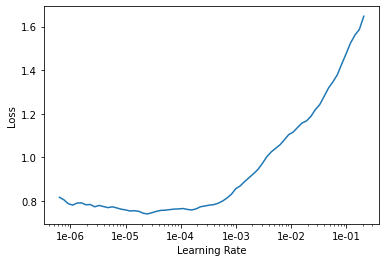

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(10, slice(5e-7, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.772174,0.944372,0.636141,14:07
1,0.738360,0.939532,0.646361,13:42
2,0.667690,0.959206,0.643091,13:42
3,0.528376,1.052091,0.646770,13:40
4,0.336537,1.122161,0.662715,13:41
5,0.205384,1.186802,0.670482,13:50
6,0.113269,1.317299,0.663123,13:53
7,0.070036,1.361233,0.667621,13:46
8,0.046067,1.372558,0.667212,13:44
9,0.033910,1.366439,0.676206,13:47


In [10]:
learn.save('stage-1-rn18_epoch')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

In [12]:
interp.most_confused(min_val=2)

[('fear', 'sad', 59),
 ('angry', 'happy', 52),
 ('sad', 'fear', 50),
 ('neutral', 'sad', 46),
 ('fear', 'happy', 44),
 ('disgust', 'sad', 42),
 ('sad', 'neutral', 40),
 ('happy', 'fear', 38),
 ('disgust', 'angry', 33),
 ('disgust', 'fear', 31),
 ('disgust', 'neutral', 30),
 ('happy', 'neutral', 29),
 ('happy', 'angry', 26),
 ('fear', 'disgust', 25),
 ('neutral', 'disgust', 25),
 ('angry', 'disgust', 23),
 ('disgust', 'happy', 23),
 ('sad', 'disgust', 22),
 ('fear', 'neutral', 21),
 ('neutral', 'happy', 19),
 ('happy', 'disgust', 18),
 ('fear', 'angry', 17),
 ('happy', 'sad', 15),
 ('neutral', 'fear', 14),
 ('angry', 'neutral', 13),
 ('angry', 'fear', 10),
 ('sad', 'happy', 10),
 ('sad', 'angry', 7),
 ('neutral', 'angry', 6),
 ('angry', 'sad', 4)]

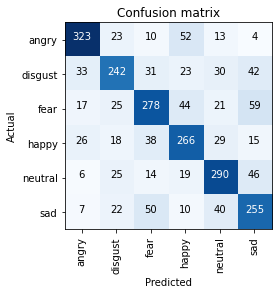

In [13]:
interp.plot_confusion_matrix()